In [2]:
# Load all necessary libs
import numpy as np
import gzip
import cPickle as pickle
from utils import *
from IPython.display import Image

In [3]:
# Load keras modules
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using Theano backend.
C:\Anaconda\lib\site-packages\theano-0.8.0.dev0-py2.7.egg\theano\tensor\signal\downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [4]:
# load and preprocess dataset
(X_train, y_train), (X_test, y_test) = pickle.load(gzip.open('usps.pkl.gz','rb'))


# -- the input must be in the form of n x d matrix (n: #data, d: dimensionality)
[n_train, _, d1, d2] = X_train.shape
d = d1*d2
X_train = np.reshape(X_train, (n_train, d)).astype('float32')
X_train /= 255.0

[n_test, _, d1, d2] = X_test.shape
d = d1*d2
X_test = np.reshape(X_test, (n_test, d)).astype('float32')
X_test /= 255.0

# -- the label must be converted into one-hot vector
Y_train = np_utils.to_categorical(y_train, nb_classes=10)
Y_test = np_utils.to_categorical(y_test, nb_classes=10)

In [8]:
# Verify / visualize data (optional)
print(np.min(X_train),' - ', np.max(X_train))


(0.0, ' - ', 1.0)


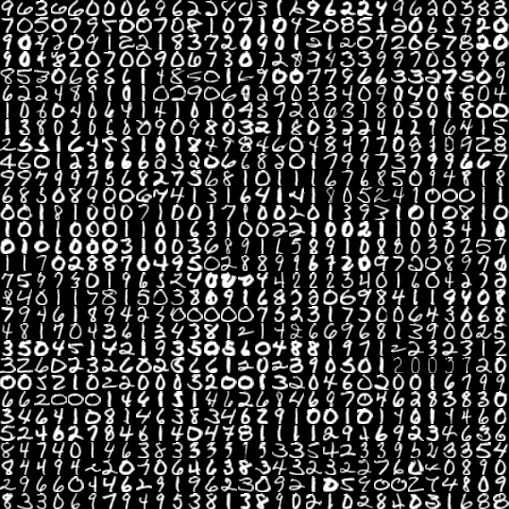

In [11]:
Image(
    filename=visualize_data(X_test, img_shape=(16,16), tile_shape=(30,30))
)

In [13]:
# Create logistic regression model
logrec = Sequential()
logrec.add(Dense(10, input_dim=256))
logrec.add(Activation('softmax'))

In [14]:
# Define optimizer and loss function
logrec.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(lr=0.02, momentum=0.9, nesterov=True)
)


In [15]:
# Training
logrec.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          batch_size=10, nb_epoch=10, show_accuracy=True)

Train on 7291 samples, validate on 2007 samples
Epoch 1/10
7291/7291 [==============================] - 1s - loss: 0.3702 - acc: 0.8969 - val_loss: 0.3988 - val_acc: 0.8929
Epoch 2/10
7291/7291 [==============================] - 0s - loss: 0.2166 - acc: 0.9418 - val_loss: 0.3658 - val_acc: 0.9083
Epoch 3/10
7291/7291 [==============================] - 0s - loss: 0.1928 - acc: 0.9475 - val_loss: 0.3686 - val_acc: 0.9083
Epoch 4/10
7291/7291 [==============================] - 0s - loss: 0.1789 - acc: 0.9517 - val_loss: 0.3618 - val_acc: 0.9118
Epoch 5/10
7291/7291 [==============================] - 0s - loss: 0.1692 - acc: 0.9556 - val_loss: 0.3642 - val_acc: 0.9063
Epoch 6/10
7291/7291 [==============================] - 0s - loss: 0.1612 - acc: 0.9567 - val_loss: 0.3717 - val_acc: 0.9048
Epoch 7/10
7291/7291 [==============================] - 0s - loss: 0.1579 - acc: 0.9553 - val_loss: 0.3537 - val_acc: 0.9138
Epoch 8/10
7291/7291 [==============================] - 0s - loss: 0.1506 - a

In [17]:
nn = Sequential()
# hidden layer 1
nn.add(Dense(100, input_dim=256))
nn.add(Activation('relu'))

#hidden layer 2
nn.add(Dense(100))
nn.add(Activation('relu'))

# output layer
nn.add(Dense(10))
nn.add(Activation('softmax'))

In [18]:
nn.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(lr=0.001, momentum=0.9, nesterov=True)
)

In [19]:
# Training
nn.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          batch_size=10, nb_epoch=10, show_accuracy=True)

Train on 7291 samples, validate on 2007 samples
Epoch 1/10
7291/7291 [==============================] - 1s - loss: 1.1322 - acc: 0.6885 - val_loss: 0.5539 - val_acc: 0.8590
Epoch 2/10
7291/7291 [==============================] - 1s - loss: 0.3373 - acc: 0.9133 - val_loss: 0.3938 - val_acc: 0.8939
Epoch 3/10
7291/7291 [==============================] - 1s - loss: 0.2405 - acc: 0.9349 - val_loss: 0.3712 - val_acc: 0.8979
Epoch 4/10
7291/7291 [==============================] - 1s - loss: 0.2036 - acc: 0.9445 - val_loss: 0.3426 - val_acc: 0.9083
Epoch 5/10
7291/7291 [==============================] - 1s - loss: 0.1787 - acc: 0.9513 - val_loss: 0.3341 - val_acc: 0.9108
Epoch 6/10
7291/7291 [==============================] - 2s - loss: 0.1655 - acc: 0.9542 - val_loss: 0.3279 - val_acc: 0.9143
Epoch 7/10
7291/7291 [==============================] - 1s - loss: 0.1540 - acc: 0.9575 - val_loss: 0.3131 - val_acc: 0.9198
Epoch 8/10
7291/7291 [==============================] - 1s - loss: 0.1435 - a